In [ ]:
"""
Koraci po redu:
1. Dodavanje biblioteka
2. Ucitavanje podataka
3. Provera koliko ima praznih podataka po kolonama
4. Overview podataka
5. Crtanje podataka
6. Trazenje korelacija izmedju podataka
7. Igranje sa podacima
8. Puno igranja sa podacima (Izbacivanje, modifikovanje)
9. Razdvajanje kolone koje pogadjamo i atributa (X i y) + Train test split 
10. Normalizacija
11. Kreiranje modela i dodavanje slojeva
12. Treniranje
13. Evaluacija nakon treniranja (plotovanje podataka loss-ova) i analiza
14. Cross validacija
15. Predikcija
16. Evaluacija
"""

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

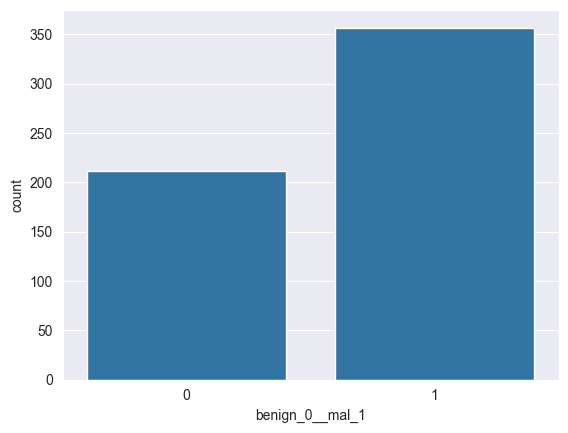

In [13]:
#Provera balansiranosti skupa
sns.countplot(x='benign_0__mal_1', data=df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


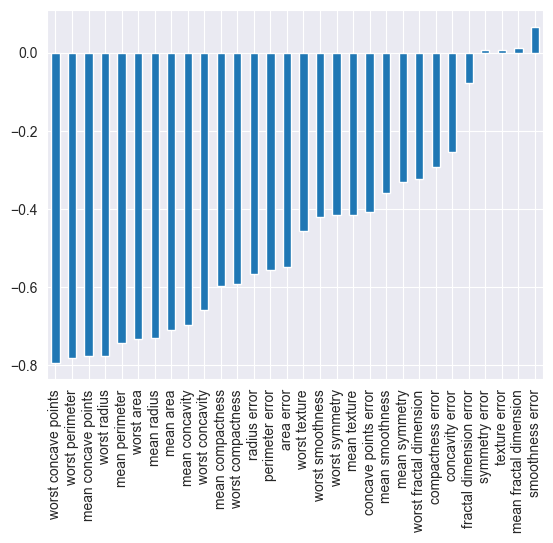

In [20]:
corr = df.corr()
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
corr.style.background_gradient(cmap='coolwarm')

In [5]:
#Preskacemo puno koraka i idemo na:
# 9. Razdvajanje kolone koje pogadjamo i atributa (X i y) + Train test split 
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [6]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

In [7]:
#Normalizacija
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# 11. Kreiranje modela i dodavanje slojeva
# 12. Treniranje

model = Sequential() 

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Output layer menjamo aktivacionu funkciju na sigmoidnu jer je ovo binarna klasifikacija s tim u vidu mozemo na izlazu da ocekujemo samo 0 ili 1
model.add(Dense(1, activation='sigmoid'))

In [16]:
#Kompajliranje
model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
#Treniranje
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test)) #Namerno overfittujemo sa velikim brojem epoha

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6869 - val_loss: 0.6676
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6632 - val_loss: 0.6397
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6336 - val_loss: 0.6076
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6022 - val_loss: 0.5633
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5521 - val_loss: 0.5128
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5161 - val_loss: 0.4602
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4717 - val_loss: 0.4132
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4199 - val_loss: 0.3745
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3916 - val_loss: 0.3355
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3679 - val_loss: 0.3107
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3180 - val_loss: 0.2817
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

<Axes: >

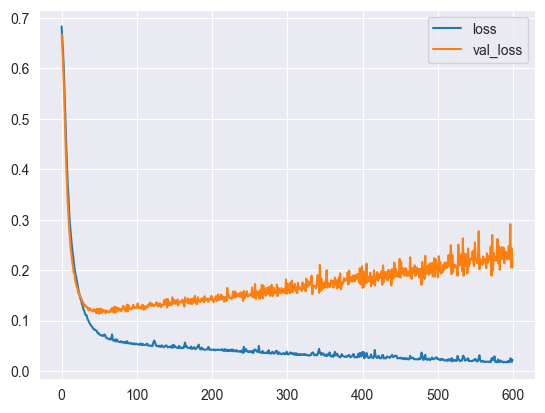

In [18]:
#Plotovanje greske
losses = pd.DataFrame(model.history.history)
losses.plot()
#Jasno se vidi da smo mogli da prekinemo treniranje vec pre 100. epohe na ovom data setu
#Uradicemo sad Keras call back tj. early stopping

In [23]:
#Ponovo kreiramo model
model = Sequential() 

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#Output layer menjamo aktivacionu funkciju na sigmoidnu jer je ovo binarna klasifikacija s tim u vidu mozemo na izlazu da ocekujemo samo 0 ili 1
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks.early_stopping:

class EarlyStopping(keras.src.callbacks.callback.Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |
 |  Stop training when a monitored metric has stopped improving.
 |
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |
 |  Args:
 |      monitor: Quantity to be monitored. Defaults to `"val

In [24]:
callback = EarlyStopping(monitor = 'val_loss',mode='min' , patience = 25, verbose = 1)

In [26]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),
          callbacks=[callback]) #Namerno overfittujemo sa velikim brojem epoha

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7003 - val_loss: 0.6721
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6543 - val_loss: 0.6356
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6172 - val_loss: 0.5938
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5747 - val_loss: 0.5455
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5266 - val_loss: 0.4939
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4716 - val_loss: 0.4451
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4360 - val_loss: 0.3992
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3843 - val_loss: 0.3568
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3403 - val_loss: 0.3237
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3242 - val_loss: 0.2921
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2894 - val_loss: 0.2658
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

<Axes: >

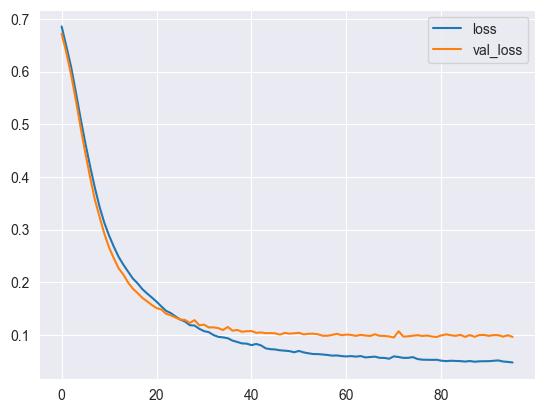

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [30]:
help(Dropout)

Help on class Dropout in module keras.src.layers.regularization.dropout:

class Dropout(keras.src.layers.layer.Layer)
 |  Dropout(rate, noise_shape=None, seed=None, **kwargs)
 |
 |  Applies dropout to the input.
 |
 |  The `Dropout` layer randomly sets input units to 0 with a frequency of
 |  `rate` at each step during training time, which helps prevent overfitting.
 |  Inputs not set to 0 are scaled up by `1 / (1 - rate)` such that the sum over
 |  all inputs is unchanged.
 |
 |  Note that the `Dropout` layer only applies when `training` is set to `True`
 |  in `call()`, such that no values are dropped during inference.
 |  When using `model.fit`, `training` will be appropriately set to `True`
 |  automatically. In other contexts, you can set the argument explicitly
 |  to `True` when calling the layer.
 |
 |  (This is in contrast to setting `trainable=False` for a `Dropout` layer.
 |  `trainable` does not affect the layer's behavior, as `Dropout` does
 |  not have any variables/weigh

In [8]:
#Ponovo kreiramo model ovaj put koristimo tehniku Dropout layers da ne bismo overfittovali
model = Sequential() 

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5)) #Prvi parametar je procenat neurona koje iskljucujemo. Ako stavimo 0 iskljucicemo 0 neurona. Praksa je 0.2-0.5 Pola 0d ovih 30 neurona iznad ce biti ugasena svaku epohu
model.add(Dense(15, activation='relu'))

#Output layer menjamo aktivacionu funkciju na sigmoidnu jer je ovo binarna klasifikacija s tim u vidu mozemo na izlazu da ocekujemo samo 0 ili 1
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min' , patience = 25, verbose =1) 

In [10]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stopping]) 

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.6805 - val_loss: 0.6578
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6534 - val_loss: 0.6317
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6380 - val_loss: 0.6013
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6152 - val_loss: 0.5644
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5915 - val_loss: 0.5254
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5271 - val_loss: 0.4777
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5039 - val_loss: 0.4293
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4876 - val_loss: 0.3888
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4586 - val_loss: 0.3530
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4026 - val_loss: 0.3204
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3946 - val_loss: 0.2956
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

<Axes: >

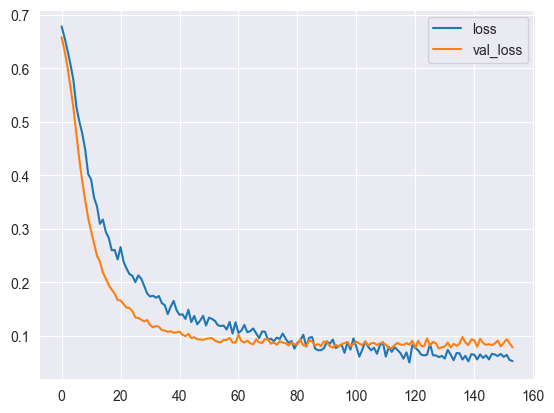

In [11]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [12]:
#Evaluacija
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [17]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
